In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_excel('Sample - Superstore.xls')
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [20]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [21]:
furniture = df.loc[df['Category'] == 'Furniture']#location is fetched in local dataframe.
furniture.shape

(2121, 21)

In [22]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [23]:
furniture=furniture[["Order Date","Sales"]]# order date is indexing column and sales is y column
furniture = furniture.sort_values('Order Date')#sorting on order date
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [24]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [25]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()#grouping the 2 values which have same date and summing that into single block.
#resetindex would give the default index.
furniture.shape

(889, 2)

In [26]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [28]:
furniture = furniture.set_index('Order Date')#set order date as indexing column.

In [29]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [31]:
y = furniture['Sales'].resample('MS').mean()#single entity for monthly level.MS= monthly start


In [33]:
print(y.shape)
y


(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

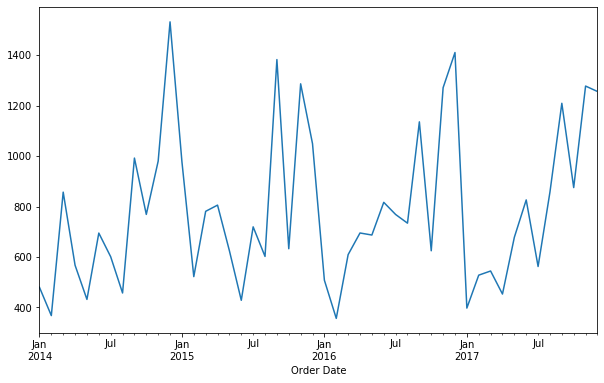

In [35]:
y.plot(figsize=(10, 6))
plt.show()

In [36]:
train=y.loc[:'2016-12-01']#from 1st jan to 1 st dec 2016 
train.tail()

Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [37]:

test=y.loc['2017-01-01':]#from 1st jan to the end
test.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

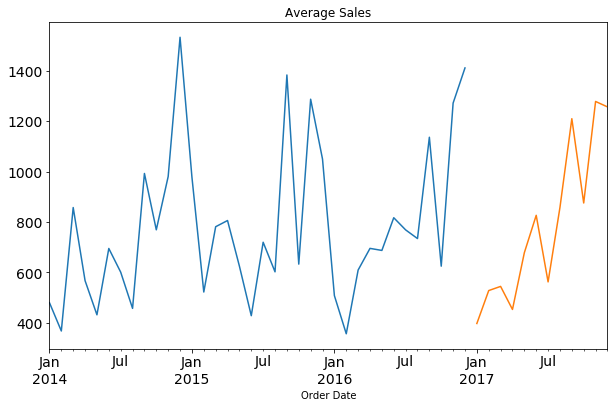

In [38]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

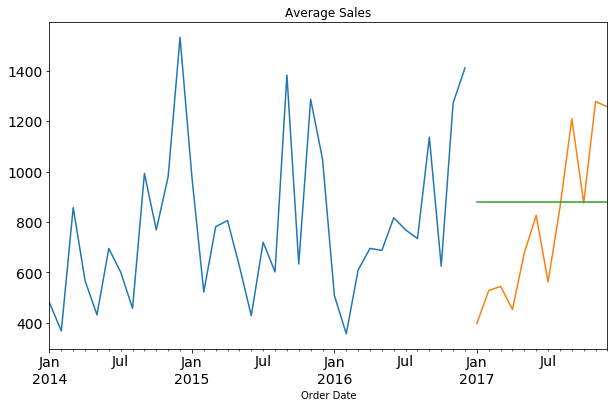

In [40]:
from statsmodels.tsa.api import SimpleExpSmoothing 
Exp_Smooth = test.copy()
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)#value close to 0.1 means the older data is less important and new data is more important.
Exp_Smooth['SES'] = fit1.forecast(len(test))#forecast means how much time u want to forecast. len(test) means we want to forecast on those 12 datasets.

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

316.3327190200752


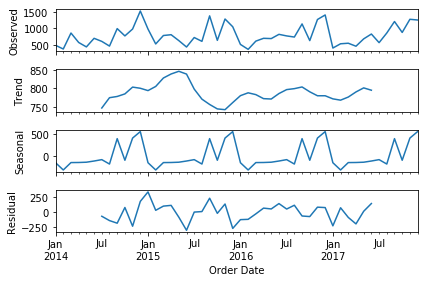

In [43]:
#which model is useful
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)#1
fig = decomposition.plot()
plt.show()
#residual is the random error line.

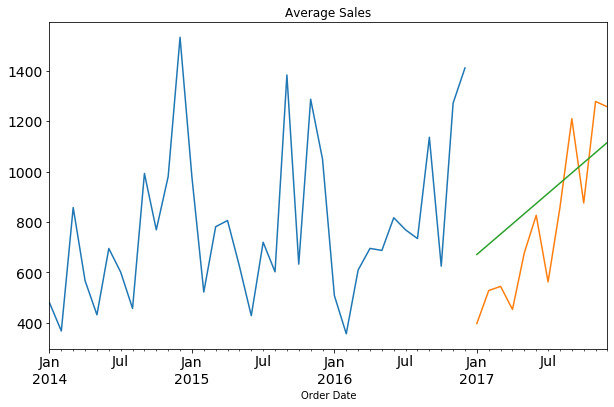

In [45]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

fit1 = Holt(train).fit(smoothing_level = 0.05,smoothing_slope = 0.75)#fit the training data, smoothing level the weights on the data, smoothing slope incilination angle.
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

215.57931215799604


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


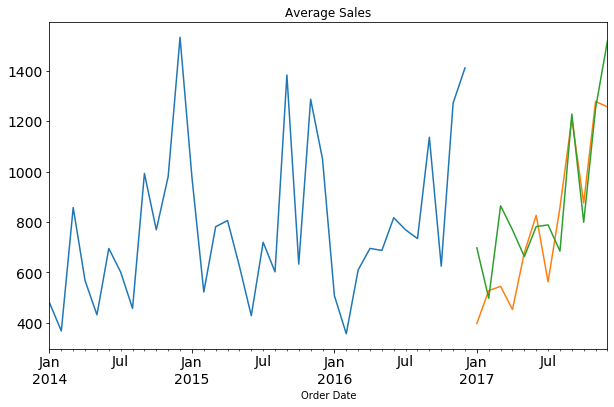

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,#senality periods means that every 12months the pattern is repeated. 
                            
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))
#2 models: addtive, multiplicative(mul)
# addtive :where stable graphs
# multiplicative: where exponential graph
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

193.9119904555351


In [49]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic:',result[0])
print('p-value: %f' %result[1])
#p <=0.05 than it shows the unstationary can be ignored.

ADF Statistic: -5.191070187339275
p-value: 0.000009


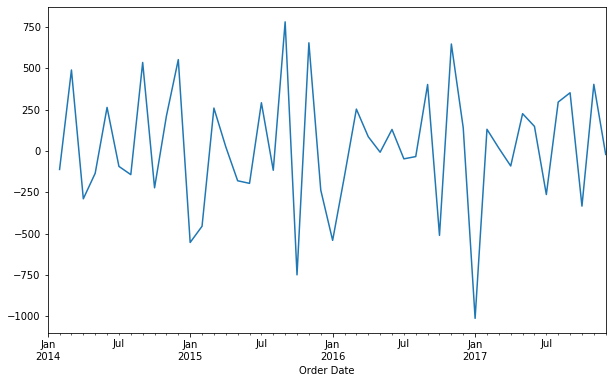

In [51]:
#1st order is passed to convert it into stationary
#f=y.diff( periods= 1)
#f.plot(figsize=(10, 6))
#plt.show()


In [54]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX:',pdq[7],'x', seasonal_pdq[7])


SARIMAX: (0, 2, 1) x (0, 2, 1, 12)


In [55]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [57]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [62]:

aic_list=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                seasonal_order=param_seasonal,enforce_invertibility=False,
                                            enforce_stationarity=False) 
            results = mod.fit()
            print('ARIMA',param,'x',param_seasonal,' - AIC:',results.aic)
            aic_list.append(results.aic)
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)  - AIC: 769.0817523205916


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (0, 0, 1, 12)  - AIC: 1262.9008852943964
ARIMA (0, 0, 0) x (0, 1, 0, 12)  - AIC: 477.71701309202774
ARIMA (0, 0, 0) x (0, 2, 0, 12)  - AIC: 336.95366048461585
ARIMA (0, 0, 0) x (1, 0, 0, 12)  - AIC: 497.2314433418337


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)  - AIC: 839.0882067141837
ARIMA (0, 0, 0) x (1, 1, 0, 12)  - AIC: 318.0047199116341
ARIMA (0, 0, 0) x (1, 2, 0, 12)  - AIC: 162.1202948716551
ARIMA (0, 0, 0) x (2, 0, 0, 12)  - AIC: 319.96929434508735


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (2, 0, 1, 12)  - AIC: 742.1917402231059
ARIMA (0, 0, 0) x (2, 1, 0, 12)  - AIC: 159.5144730671919
ARIMA (0, 0, 1) x (0, 0, 0, 12)  - AIC: 720.9252270758096
ARIMA (0, 0, 1) x (0, 0, 1, 12)  - AIC: 2975.1512591929077
ARIMA (0, 0, 1) x (0, 1, 0, 12)  - AIC: 466.56074298091255
ARIMA (0, 0, 1) x (0, 2, 0, 12)  - AIC: 324.4135789671837


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (1, 0, 0, 12)  - AIC: 499.57839942321823


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (1, 0, 1, 12)  - AIC: 2502.4370439935674
ARIMA (0, 0, 1) x (1, 1, 0, 12)  - AIC: 319.9884876946869
ARIMA (0, 0, 1) x (1, 2, 0, 12)  - AIC: 163.98834428110356
ARIMA (0, 0, 1) x (2, 0, 0, 12)  - AIC: 321.9645277037848


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (2, 0, 1, 12)  - AIC: 774.1300262841672
ARIMA (0, 0, 1) x (2, 1, 0, 12)  - AIC: 160.8541004925012
ARIMA (0, 0, 2) x (0, 0, 0, 12)  - AIC: 695.9854310935208


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (0, 0, 1, 12)  - AIC: 2641.7116566043064
ARIMA (0, 0, 2) x (0, 1, 0, 12)  - AIC: 455.20934746187635
ARIMA (0, 0, 2) x (0, 2, 0, 12)  - AIC: 311.8417385725391


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (1, 0, 0, 12)  - AIC: 500.99966452882825
ARIMA (0, 0, 2) x (1, 0, 1, 12)  - AIC: 18845.294779592143
ARIMA (0, 0, 2) x (1, 1, 0, 12)  - AIC: 321.8800584473879
ARIMA (0, 0, 2) x (1, 2, 0, 12)  - AIC: 164.1823760377613
ARIMA (0, 0, 2) x (2, 0, 0, 12)  - AIC: 323.58227595521737


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (2, 0, 1, 12)  - AIC: 630.1193416998775
ARIMA (0, 0, 2) x (2, 1, 0, 12)  - AIC: 163.57819530873556
ARIMA (0, 1, 0) x (0, 0, 0, 12)  - AIC: 677.8947668259311


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (0, 0, 1, 12)  - AIC: 1413.6477298516172
ARIMA (0, 1, 0) x (0, 1, 0, 12)  - AIC: 486.63785672282035
ARIMA (0, 1, 0) x (0, 2, 0, 12)  - AIC: 334.9778123365098
ARIMA (0, 1, 0) x (1, 0, 0, 12)  - AIC: 497.78896630044073


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)  - AIC: 1352.6147833754385
ARIMA (0, 1, 0) x (1, 1, 0, 12)  - AIC: 319.7714068109212
ARIMA (0, 1, 0) x (1, 2, 0, 12)  - AIC: 152.4285210659633
ARIMA (0, 1, 0) x (2, 0, 0, 12)  - AIC: 317.69402237661177


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (2, 0, 1, 12)  - AIC: 847.4083314047551
ARIMA (0, 1, 0) x (2, 1, 0, 12)  - AIC: 153.33829187964872
ARIMA (0, 1, 1) x (0, 0, 0, 12)  - AIC: 649.9056176817146
ARIMA (0, 1, 1) x (0, 0, 1, 12)  - AIC: 2712.447035999132
ARIMA (0, 1, 1) x (0, 1, 0, 12)  - AIC: 458.8705548482808
ARIMA (0, 1, 1) x (0, 2, 0, 12)  - AIC: 317.1957697239929
ARIMA (0, 1, 1) x (1, 0, 0, 12)  - AIC: 486.1832977442803
ARIMA (0, 1, 1) x (1, 0, 1, 12)  - AIC: 2573.057462343724
ARIMA (0, 1, 1) x (1, 1, 0, 12)  - AIC: 310.75743684173517
ARIMA (0, 1, 1) x (1, 2, 0, 12)  - AIC: 154.4175410259515
ARIMA (0, 1, 1) x (2, 0, 0, 12)  - AIC: 311.85906742411925


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (2, 0, 1, 12)  - AIC: 924.257404736361
ARIMA (0, 1, 1) x (2, 1, 0, 12)  - AIC: 149.57227369321828
ARIMA (0, 1, 2) x (0, 0, 0, 12)  - AIC: 634.8844283595733
ARIMA (0, 1, 2) x (0, 0, 1, 12)  - AIC: 2614.1204919808815
ARIMA (0, 1, 2) x (0, 1, 0, 12)  - AIC: 447.5857396952605
ARIMA (0, 1, 2) x (0, 2, 0, 12)  - AIC: 305.0344535943279
ARIMA (0, 1, 2) x (1, 0, 0, 12)  - AIC: 487.49869126812695
ARIMA (0, 1, 2) x (1, 0, 1, 12)  - AIC: 2812.3950158909784
ARIMA (0, 1, 2) x (1, 1, 0, 12)  - AIC: 310.73389307281394
ARIMA (0, 1, 2) x (1, 2, 0, 12)  - AIC: 154.69701034326
ARIMA (0, 1, 2) x (2, 0, 0, 12)  - AIC: 313.4823847170337


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (2, 0, 1, 12)  - AIC: 815.2296836885961
ARIMA (0, 1, 2) x (2, 1, 0, 12)  - AIC: 151.1905645784282
ARIMA (0, 2, 0) x (0, 0, 0, 12)  - AIC: 710.1125557214733
ARIMA (0, 2, 0) x (0, 0, 1, 12)  - AIC: 1400.9430002821964
ARIMA (0, 2, 0) x (0, 1, 0, 12)  - AIC: 509.89680954679733
ARIMA (0, 2, 0) x (0, 2, 0, 12)  - AIC: 342.95441984186476
ARIMA (0, 2, 0) x (1, 0, 0, 12)  - AIC: 520.887712617653


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (1, 0, 1, 12)  - AIC: 1449.9471373436354
ARIMA (0, 2, 0) x (1, 1, 0, 12)  - AIC: 331.25048446851144
ARIMA (0, 2, 0) x (1, 2, 0, 12)  - AIC: 141.68398673297673
ARIMA (0, 2, 0) x (2, 0, 0, 12)  - AIC: 327.59550043149045


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (2, 0, 1, 12)  - AIC: 837.5339420528786
ARIMA (0, 2, 0) x (2, 1, 0, 12)  - AIC: 143.52744982862234
ARIMA (0, 2, 1) x (0, 0, 0, 12)  - AIC: 652.8685965207407
ARIMA (0, 2, 1) x (0, 0, 1, 12)  - AIC: 2602.833761594331
ARIMA (0, 2, 1) x (0, 1, 0, 12)  - AIC: 463.03465442793214
ARIMA (0, 2, 1) x (0, 2, 0, 12)  - AIC: 310.3285223971962
ARIMA (0, 2, 1) x (1, 0, 0, 12)  - AIC: 489.9458560734385
ARIMA (0, 2, 1) x (1, 0, 1, 12)  - AIC: 2787.7035732136997
ARIMA (0, 2, 1) x (1, 1, 0, 12)  - AIC: 310.98647286926007
ARIMA (0, 2, 1) x (1, 2, 0, 12)  - AIC: 143.27935910567354
ARIMA (0, 2, 1) x (2, 0, 0, 12)  - AIC: 310.50562447090715


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (2, 0, 1, 12)  - AIC: 1006.4237786446204
ARIMA (0, 2, 1) x (2, 1, 0, 12)  - AIC: 142.2987308949066
ARIMA (0, 2, 2) x (0, 0, 0, 12)  - AIC: 628.8859101988096
ARIMA (0, 2, 2) x (0, 0, 1, 12)  - AIC: 2597.530839831969
ARIMA (0, 2, 2) x (0, 1, 0, 12)  - AIC: 440.1803441499159
ARIMA (0, 2, 2) x (0, 2, 0, 12)  - AIC: 294.7466797054432
ARIMA (0, 2, 2) x (1, 0, 0, 12)  - AIC: 482.90037030552344
ARIMA (0, 2, 2) x (1, 0, 1, 12)  - AIC: 2408.487989615699
ARIMA (0, 2, 2) x (1, 1, 0, 12)  - AIC: 305.8984452533344
ARIMA (0, 2, 2) x (1, 2, 0, 12)  - AIC: 145.5934640561667
ARIMA (0, 2, 2) x (2, 0, 0, 12)  - AIC: 306.328077216358


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 0, 1, 12)  - AIC: 921.487948522811


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 1, 0, 12)  - AIC: 140.87909944888975
ARIMA (1, 0, 0) x (0, 0, 0, 12)  - AIC: 692.1645522067712


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)  - AIC: 1123.1962651501574
ARIMA (1, 0, 0) x (0, 1, 0, 12)  - AIC: 479.46321478521355
ARIMA (1, 0, 0) x (0, 2, 0, 12)  - AIC: 338.2224810186685
ARIMA (1, 0, 0) x (1, 0, 0, 12)  - AIC: 480.9259367935202


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)  - AIC: 1437.1267920124171
ARIMA (1, 0, 0) x (1, 1, 0, 12)  - AIC: 304.4664675084592
ARIMA (1, 0, 0) x (1, 2, 0, 12)  - AIC: 151.38820367564483
ARIMA (1, 0, 0) x (2, 0, 0, 12)  - AIC: 306.46394968427455


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (2, 0, 1, 12)  - AIC: 852.6742768151461
ARIMA (1, 0, 0) x (2, 1, 0, 12)  - AIC: 148.47129149084583
ARIMA (1, 0, 1) x (0, 0, 0, 12)  - AIC: 665.779444218628


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)  - AIC: 2653.503813142992
ARIMA (1, 0, 1) x (0, 1, 0, 12)  - AIC: 468.3685195815004
ARIMA (1, 0, 1) x (0, 2, 0, 12)  - AIC: 326.36049011937155
ARIMA (1, 0, 1) x (1, 0, 0, 12)  - AIC: 482.57633238772786
ARIMA (1, 0, 1) x (1, 0, 1, 12)  - AIC: 3279.779685811484
ARIMA (1, 0, 1) x (1, 1, 0, 12)  - AIC: 306.01560021176573
ARIMA (1, 0, 1) x (1, 2, 0, 12)  - AIC: 153.45916401735315
ARIMA (1, 0, 1) x (2, 0, 0, 12)  - AIC: 309.70965678833227


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 1, 12)  - AIC: 919.6260916529262
ARIMA (1, 0, 1) x (2, 1, 0, 12)  - AIC: 148.64415332020477
ARIMA (1, 0, 2) x (0, 0, 0, 12)  - AIC: 652.5371565500263


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (0, 0, 1, 12)  - AIC: nan
ARIMA (1, 0, 2) x (0, 1, 0, 12)  - AIC: 454.51625971600413
ARIMA (1, 0, 2) x (0, 2, 0, 12)  - AIC: 311.9686688260367
ARIMA (1, 0, 2) x (1, 0, 0, 12)  - AIC: 483.9435796453899
ARIMA (1, 0, 2) x (1, 0, 1, 12)  - AIC: 3330168.866503052
ARIMA (1, 0, 2) x (1, 1, 0, 12)  - AIC: 305.8460722902931


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 2, 0, 12)  - AIC: 153.23892185525756
ARIMA (1, 0, 2) x (2, 0, 0, 12)  - AIC: 309.0066788573627


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 1, 12)  - AIC: 796.9170700629461
ARIMA (1, 0, 2) x (2, 1, 0, 12)  - AIC: 150.64208002333663
ARIMA (1, 1, 0) x (0, 0, 0, 12)  - AIC: 671.2513547541902


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (0, 0, 1, 12)  - AIC: 1605.9925227629037
ARIMA (1, 1, 0) x (0, 1, 0, 12)  - AIC: 479.20034222811347
ARIMA (1, 1, 0) x (0, 2, 0, 12)  - AIC: 332.39565976239567
ARIMA (1, 1, 0) x (1, 0, 0, 12)  - AIC: 475.3403658785043


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)  - AIC: 1306.0925140477964
ARIMA (1, 1, 0) x (1, 1, 0, 12)  - AIC: 300.6270901345414
ARIMA (1, 1, 0) x (1, 2, 0, 12)  - AIC: 140.97940432822267
ARIMA (1, 1, 0) x (2, 0, 0, 12)  - AIC: 301.7688524289582


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (2, 0, 1, 12)  - AIC: 869.7670172297072
ARIMA (1, 1, 0) x (2, 1, 0, 12)  - AIC: 141.0336117250372
ARIMA (1, 1, 1) x (0, 0, 0, 12)  - AIC: 649.0318019835125
ARIMA (1, 1, 1) x (0, 0, 1, 12)  - AIC: 2706.243082489858
ARIMA (1, 1, 1) x (0, 1, 0, 12)  - AIC: 460.47626876098116
ARIMA (1, 1, 1) x (0, 2, 0, 12)  - AIC: 317.99077543476295
ARIMA (1, 1, 1) x (1, 0, 0, 12)  - AIC: 469.525035466081


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)  - AIC: 2576.305524683936
ARIMA (1, 1, 1) x (1, 1, 0, 12)  - AIC: 297.78754395396106
ARIMA (1, 1, 1) x (1, 2, 0, 12)  - AIC: 139.89884389568027
ARIMA (1, 1, 1) x (2, 0, 0, 12)  - AIC: 304.81353214544197


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (2, 0, 1, 12)  - AIC: 886.011858932662
ARIMA (1, 1, 1) x (2, 1, 0, 12)  - AIC: 138.33714365180742
ARIMA (1, 1, 2) x (0, 0, 0, 12)  - AIC: 636.8790377891644


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (0, 0, 1, 12)  - AIC: 2475.036630917959
ARIMA (1, 1, 2) x (0, 1, 0, 12)  - AIC: 449.4788858975197
ARIMA (1, 1, 2) x (0, 2, 0, 12)  - AIC: 305.71513971589843
ARIMA (1, 1, 2) x (1, 0, 0, 12)  - AIC: 471.05557650906024
ARIMA (1, 1, 2) x (1, 0, 1, 12)  - AIC: 10136782.16454795


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (1, 1, 0, 12)  - AIC: 299.703823981777
ARIMA (1, 1, 2) x (1, 2, 0, 12)  - AIC: 142.46380187452223
ARIMA (1, 1, 2) x (2, 0, 0, 12)  - AIC: 302.2177681386451


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (2, 0, 1, 12)  - AIC: 926.5325914280926


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (2, 1, 0, 12)  - AIC: 140.9024011665672
ARIMA (1, 2, 0) x (0, 0, 0, 12)  - AIC: 691.2298181871188


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (0, 0, 1, 12)  - AIC: 1038.6624865507515
ARIMA (1, 2, 0) x (0, 1, 0, 12)  - AIC: 487.72549582761314
ARIMA (1, 2, 0) x (0, 2, 0, 12)  - AIC: 326.7564415658332
ARIMA (1, 2, 0) x (1, 0, 0, 12)  - AIC: 485.774688590056
ARIMA (1, 2, 0) x (1, 0, 1, 12)  - AIC: 2219.52569099224
ARIMA (1, 2, 0) x (1, 1, 0, 12)  - AIC: 302.05521432252664
ARIMA (1, 2, 0) x (1, 2, 0, 12)  - AIC: 129.59004245503533
ARIMA (1, 2, 0) x (2, 0, 0, 12)  - AIC: 303.838521691436


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (2, 0, 1, 12)  - AIC: 814.5116981717529
ARIMA (1, 2, 0) x (2, 1, 0, 12)  - AIC: 130.86502683943394
ARIMA (1, 2, 1) x (0, 0, 0, 12)  - AIC: 647.5183048787454
ARIMA (1, 2, 1) x (0, 0, 1, 12)  - AIC: 2528.900805705414
ARIMA (1, 2, 1) x (0, 1, 0, 12)  - AIC: 455.9868411970359
ARIMA (1, 2, 1) x (0, 2, 0, 12)  - AIC: 308.33975356019283
ARIMA (1, 2, 1) x (1, 0, 0, 12)  - AIC: 470.8350262821566
ARIMA (1, 2, 1) x (1, 0, 1, 12)  - AIC: 13234.312548391119
ARIMA (1, 2, 1) x (1, 1, 0, 12)  - AIC: 293.0917446828871
ARIMA (1, 2, 1) x (1, 2, 0, 12)  - AIC: 128.46456179329533
ARIMA (1, 2, 1) x (2, 0, 0, 12)  - AIC: 293.7678013029192


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (2, 0, 1, 12)  - AIC: 972.8075974140947
ARIMA (1, 2, 1) x (2, 1, 0, 12)  - AIC: 130.67250513582766
ARIMA (1, 2, 2) x (0, 0, 0, 12)  - AIC: 629.3897471870449
ARIMA (1, 2, 2) x (0, 0, 1, 12)  - AIC: 2452.1819721051825
ARIMA (1, 2, 2) x (0, 1, 0, 12)  - AIC: 442.0816341807144
ARIMA (1, 2, 2) x (0, 2, 0, 12)  - AIC: 294.56278264588116
ARIMA (1, 2, 2) x (1, 0, 0, 12)  - AIC: 470.5931670709118
ARIMA (1, 2, 2) x (1, 0, 1, 12)  - AIC: 2409.9506285590683
ARIMA (1, 2, 2) x (1, 1, 0, 12)  - AIC: 293.3465954553294
ARIMA (1, 2, 2) x (1, 2, 0, 12)  - AIC: 127.9594803852306
ARIMA (1, 2, 2) x (2, 0, 0, 12)  - AIC: 294.00291413751006


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (2, 0, 1, 12)  - AIC: 951.07907256785
ARIMA (1, 2, 2) x (2, 1, 0, 12)  - AIC: 129.61643100707843
ARIMA (2, 0, 0) x (0, 0, 0, 12)  - AIC: 673.0244705850719


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (0, 0, 1, 12)  - AIC: nan
ARIMA (2, 0, 0) x (0, 1, 0, 12)  - AIC: 468.3152343271876
ARIMA (2, 0, 0) x (0, 2, 0, 12)  - AIC: 326.1432862885688
ARIMA (2, 0, 0) x (1, 0, 0, 12)  - AIC: 469.6045539473415
ARIMA (2, 0, 0) x (1, 0, 1, 12)  - AIC: 1233.250319893233
ARIMA (2, 0, 0) x (1, 1, 0, 12)  - AIC: 293.56946448405256
ARIMA (2, 0, 0) x (1, 2, 0, 12)  - AIC: 134.47815433022345
ARIMA (2, 0, 0) x (2, 0, 0, 12)  - AIC: 295.52819097157186
ARIMA (2, 0, 0) x (2, 0, 1, 12)  - AIC: 826.0391592931526
ARIMA (2, 0, 0) x (2, 1, 0, 12)  - AIC: 136.0402041883064
ARIMA (2, 0, 1) x (0, 0, 0, 12)  - AIC: 665.7944839756009
ARIMA (2, 0, 1) x (0, 0, 1, 12)  - AIC: 12017.928049769256
ARIMA (2, 0, 1) x (0, 1, 0, 12)  - AIC: 469.806921095709
ARIMA (2, 0, 1) x (0, 2, 0, 12)  - AIC: 326.61489012829344
ARIMA (2, 0, 1) x (1, 0, 0, 12)  - AIC: 471.1558179468351


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (1, 0, 1, 12)  - AIC: 2456.061616581894
ARIMA (2, 0, 1) x (1, 1, 0, 12)  - AIC: 294.14936432506596
ARIMA (2, 0, 1) x (1, 2, 0, 12)  - AIC: 136.47829623563797
ARIMA (2, 0, 1) x (2, 0, 0, 12)  - AIC: 295.93337008471764


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)  - AIC: 823.5743256426025


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 1, 0, 12)  - AIC: 133.59287381904892
ARIMA (2, 0, 2) x (0, 0, 0, 12)  - AIC: 653.6818630916443


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (0, 0, 1, 12)  - AIC: 2584.8135008810973
ARIMA (2, 0, 2) x (0, 1, 0, 12)  - AIC: 453.6893814539736
ARIMA (2, 0, 2) x (0, 2, 0, 12)  - AIC: 314.45821367126365
ARIMA (2, 0, 2) x (1, 0, 0, 12)  - AIC: 471.84787721115885


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 0, 1, 12)  - AIC: 2390.8627236493926


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 1, 0, 12)  - AIC: 288.5615262933087
ARIMA (2, 0, 2) x (1, 2, 0, 12)  - AIC: 135.252034115258


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 0, 12)  - AIC: 292.4552179292475


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 1, 12)  - AIC: 939.9996383622583


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 1, 0, 12)  - AIC: 133.45896473450586
ARIMA (2, 1, 0) x (0, 0, 0, 12)  - AIC: 651.8913365664912


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (0, 0, 1, 12)  - AIC: 1268.8939138005185
ARIMA (2, 1, 0) x (0, 1, 0, 12)  - AIC: 464.8919482420158
ARIMA (2, 1, 0) x (0, 2, 0, 12)  - AIC: 318.67122575690234
ARIMA (2, 1, 0) x (1, 0, 0, 12)  - AIC: 461.97779691394487


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (1, 0, 1, 12)  - AIC: 1351.559616032823
ARIMA (2, 1, 0) x (1, 1, 0, 12)  - AIC: 288.39356504179057
ARIMA (2, 1, 0) x (1, 2, 0, 12)  - AIC: 127.60471418785306
ARIMA (2, 1, 0) x (2, 0, 0, 12)  - AIC: 288.7598698371215


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (2, 0, 1, 12)  - AIC: 811.57598674619
ARIMA (2, 1, 0) x (2, 1, 0, 12)  - AIC: 126.86910500705143
ARIMA (2, 1, 1) x (0, 0, 0, 12)  - AIC: 653.7027592626051
ARIMA (2, 1, 1) x (0, 0, 1, 12)  - AIC: 2550.558765978558
ARIMA (2, 1, 1) x (0, 1, 0, 12)  - AIC: 461.57371821055176
ARIMA (2, 1, 1) x (0, 2, 0, 12)  - AIC: 319.47517657380195
ARIMA (2, 1, 1) x (1, 0, 0, 12)  - AIC: 457.9119800485608
ARIMA (2, 1, 1) x (1, 0, 1, 12)  - AIC: 17131.501647619774
ARIMA (2, 1, 1) x (1, 1, 0, 12)  - AIC: 287.8557403107505


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 2, 0, 12)  - AIC: 124.67867067427224
ARIMA (2, 1, 1) x (2, 0, 0, 12)  - AIC: 287.8450931503738


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 0, 1, 12)  - AIC: 884.8955099599953
ARIMA (2, 1, 1) x (2, 1, 0, 12)  - AIC: 126.3287651635741
ARIMA (2, 1, 2) x (0, 0, 0, 12)  - AIC: 642.1210464604786
ARIMA (2, 1, 2) x (0, 0, 1, 12)  - AIC: 2685.047938619584
ARIMA (2, 1, 2) x (0, 1, 0, 12)  - AIC: 450.07118888732475
ARIMA (2, 1, 2) x (0, 2, 0, 12)  - AIC: 305.94451673244646
ARIMA (2, 1, 2) x (1, 0, 0, 12)  - AIC: 459.0451067156281
ARIMA (2, 1, 2) x (1, 0, 1, 12)  - AIC: 42429.068140975105


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 1, 0, 12)  - AIC: 287.5621715111067


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 2, 0, 12)  - AIC: 127.59575569257085
ARIMA (2, 1, 2) x (2, 0, 0, 12)  - AIC: 288.57203849023546


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 0, 1, 12)  - AIC: 831.5572647673242


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 1, 0, 12)  - AIC: 127.91172999599938
ARIMA (2, 2, 0) x (0, 0, 0, 12)  - AIC: 656.9291821241189


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (0, 0, 1, 12)  - AIC: 1509.2132621175942
ARIMA (2, 2, 0) x (0, 1, 0, 12)  - AIC: 467.7456111917659
ARIMA (2, 2, 0) x (0, 2, 0, 12)  - AIC: 311.6995205193398
ARIMA (2, 2, 0) x (1, 0, 0, 12)  - AIC: 464.7608850390038


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (1, 0, 1, 12)  - AIC: 1097.1605298933614
ARIMA (2, 2, 0) x (1, 1, 0, 12)  - AIC: 286.0955354147753
ARIMA (2, 2, 0) x (1, 2, 0, 12)  - AIC: 117.90430574034433
ARIMA (2, 2, 0) x (2, 0, 0, 12)  - AIC: 283.1555485839394


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (2, 0, 1, 12)  - AIC: 800.4137692053303
ARIMA (2, 2, 0) x (2, 1, 0, 12)  - AIC: 117.49144309453331
ARIMA (2, 2, 1) x (0, 0, 0, 12)  - AIC: 643.7507440372096
ARIMA (2, 2, 1) x (0, 0, 1, 12)  - AIC: 589654.8918276952
ARIMA (2, 2, 1) x (0, 1, 0, 12)  - AIC: 457.7096702182437
ARIMA (2, 2, 1) x (0, 2, 0, 12)  - AIC: 309.3853855181672
ARIMA (2, 2, 1) x (1, 0, 0, 12)  - AIC: 455.0965992766257
ARIMA (2, 2, 1) x (1, 0, 1, 12)  - AIC: 2543.3657217266123
ARIMA (2, 2, 1) x (1, 1, 0, 12)  - AIC: 279.4519907924096
ARIMA (2, 2, 1) x (1, 2, 0, 12)  - AIC: 117.35996066333124
ARIMA (2, 2, 1) x (2, 0, 0, 12)  - AIC: 279.4551139174966


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 0, 1, 12)  - AIC: 773.5835792949756


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 1, 0, 12)  - AIC: 116.26597577326146
ARIMA (2, 2, 2) x (0, 0, 0, 12)  - AIC: 631.2678875793836
ARIMA (2, 2, 2) x (0, 0, 1, 12)  - AIC: 2447.6096699888753
ARIMA (2, 2, 2) x (0, 1, 0, 12)  - AIC: 445.24599241093443
ARIMA (2, 2, 2) x (0, 2, 0, 12)  - AIC: 296.46503563114607
ARIMA (2, 2, 2) x (1, 0, 0, 12)  - AIC: 452.31401812179365
ARIMA (2, 2, 2) x (1, 0, 1, 12)  - AIC: 2662.003238155614


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 1, 0, 12)  - AIC: 281.44499476718147


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 2, 0, 12)  - AIC: 115.84973374439413
ARIMA (2, 2, 2) x (2, 0, 0, 12)  - AIC: 281.31746769118155


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (2, 0, 1, 12)  - AIC: 741.8311439432924
ARIMA (2, 2, 2) x (2, 1, 0, 12)  - AIC: 119.41112537973882


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
print(min(aic_list))

115.84973374439413


In [65]:
#For range of pdq (0,2)
#ARIMA (1, 1, 1) x (1, 1, 0, 12)  - AIC: 297.7875439553055-->Best
"""
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),enforce_invertibility=False,
                                            enforce_stationarity=False)
results = mod.fit()
"""
#For range of pdq (0,3)
#ARIMA (2, 2, 1) x (2, 1, 0, 12)  - AIC: 116.26597421163433-->Best

#(2, 2, 2) x (1, 2, 0, 12) - AIC: 115.7951484908144
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 2, 1),
                                seasonal_order=(2, 1, 0, 12),enforce_invertibility=False,
                                            enforce_stationarity=False)
results = mod.fit()



C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


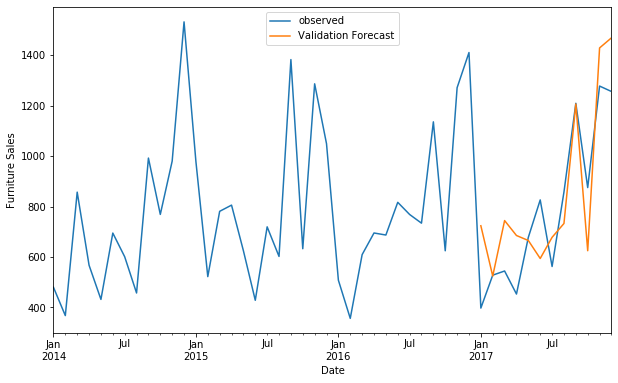

In [66]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [67]:
pred.predicted_mean

Order Date
2017-01-01     724.033010
2017-02-01     524.618253
2017-03-01     744.583329
2017-04-01     685.362373
2017-05-01     665.523227
2017-06-01     594.266519
2017-07-01     678.181736
2017-08-01     733.058300
2017-09-01    1206.682070
2017-10-01     625.074258
2017-11-01    1429.006642
2017-12-01    1468.979423
Freq: MS, dtype: float64

In [68]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


185.77906807185218


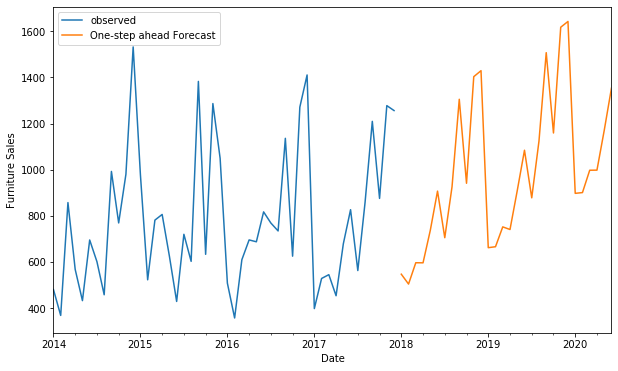

In [69]:
pred_uc = results.get_forecast(steps=30)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [70]:
Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01     546.777520
2018-02-01     503.961257
2018-03-01     596.433110
2018-04-01     596.028059
2018-05-01     736.508474
2018-06-01     907.019854
2018-07-01     704.962512
2018-08-01     925.488912
2018-09-01    1305.285297
2018-10-01     941.026504
2018-11-01    1403.329218
2018-12-01    1429.229484
2019-01-01     661.707630
2019-02-01     665.846481
2019-03-01     751.916959
2019-04-01     740.536213
2019-05-01     909.006324
2019-06-01    1084.254153
2019-07-01     877.887886
2019-08-01    1124.321453
2019-09-01    1507.410283
2019-10-01    1159.140857
2019-11-01    1617.786155
2019-12-01    1642.723537
2020-01-01     897.347803
2020-02-01     900.638139
2020-03-01     997.547035
2020-04-01     998.009682
2020-05-01    1169.782845
2020-06-01    1353.428174
Freq: MS, dtype: float64

In [71]:
type(Y_predictions)

pandas.core.series.Series

In [72]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx")